# Step 1: Load the Necessary Libraries and Data

In [4]:
import pandas as pd
import numpy as np
import random
# Load the dataset
df = pd.read_csv('C:\\Users\\THASWIKA AIRA\\Downloads\\user_purchase_data.csv')
print(df.head())


  user_id                                  purchase_sequence  \
0   user1                                      amazon,amazon   
1   user2                                    flipkart,amazon   
2   user3  flipkart,flipkart,amazon,myntra,myntra,amazon,...   
3   user4                                      myntra,myntra   
4   user5      amazon,amazon,myntra,flipkart,flipkart,amazon   

                                          timestamps  \
0                              2024-01-15,2024-01-09   
1                              2024-01-06,2024-01-14   
2  2024-02-18,2024-01-22,2024-01-07,2024-01-06,20...   
3                              2024-01-25,2024-01-18   
4  2024-02-16,2024-01-16,2024-01-11,2024-01-30,20...   

                              amounts  \
0                             427,102   
1                             169,308   
2  359,185,463,72,423,285,324,113,243   
3                             282,375   
4             377,402,335,162,400,216   

                               

In [5]:
df

,user_id,purchase_sequence,timestamps,amounts,categories
0,user1,"amazon,amazon","2024-01-15,2024-01-09","427,102","home,beauty"
1,user2,"flipkart,amazon","2024-01-06,2024-01-14","169,308","home,books"
2,user3,"flipkart,flipkart,amazon,myntra,myntra,amazon,...","2024-02-18,2024-01-22,2024-01-07,2024-01-06,20...","359,185,463,72,423,285,324,113,243","electronics,fashion,home,beauty,fashion,electr..."
3,user4,"myntra,myntra","2024-01-25,2024-01-18","282,375","beauty,electronics"
4,user5,"amazon,amazon,myntra,flipkart,flipkart,amazon","2024-02-16,2024-01-16,2024-01-11,2024-01-30,20...","377,402,335,162,400,216","beauty,home,fashion,electronics,fashion,fashion"
...,...,...,...,...,...
95,user96,"myntra,flipkart,amazon,amazon,amazon,myntra","2024-01-18,2024-01-09,2024-02-10,2024-01-20,20...","97,307,378,136,353,347","electronics,home,home,home,beauty,books"
96,user97,amazon,2024-03-01,378,home
97,user98,"flipkart,myntra,flipkart,flipkart,flipkart","2024-02-10,2024-02-04,2024-01-19,2024-02-11,20...","297,175,462,463,400","books,books,home,electronics,books"
98,user99,"amazon,flipkart,amazon,myntra,myntra,myntra,my...","2024-01-24,2024-02-02,2024-02-05,2024-01-07,20...","186,280,176,122,99,75,198,246","beauty,books,beauty,beauty,beauty,beauty,home,..."


# Clean the Dataset

In [8]:
# Data Cleaning
def clean_data(df):
    # Split the sequence columns into lists
    df['purchase_sequence'] = df['purchase_sequence'].apply(lambda x: x.split(','))
    df['timestamps'] = df['timestamps'].apply(lambda x: x.split(','))
    df['amounts'] = df['amounts'].apply(lambda x: list(map(int, x.split(','))))
    df['categories'] = df['categories'].apply(lambda x: x.split(','))
     # Encode the purchase sequence
    all_purchases = set([item for sublist in df['purchase_sequence'].tolist() for item in sublist])
    purchase_encoder = {item: i for i, item in enumerate(all_purchases)}
    df['encoded_sequence'] = df['purchase_sequence'].apply(lambda x: [purchase_encoder[item] for item in x])
    
    return df, purchase_encoder

df, purchase_encoder = clean_data(df)
print(df.head())

    
   

  user_id                                  purchase_sequence  \
0   user1                                   [amazon, amazon]   
1   user2                                 [flipkart, amazon]   
2   user3  [flipkart, flipkart, amazon, myntra, myntra, a...   
3   user4                                   [myntra, myntra]   
4   user5  [amazon, amazon, myntra, flipkart, flipkart, a...   

                                          timestamps  \
0                           [2024-01-15, 2024-01-09]   
1                           [2024-01-06, 2024-01-14]   
2  [2024-02-18, 2024-01-22, 2024-01-07, 2024-01-0...   
3                           [2024-01-25, 2024-01-18]   
4  [2024-02-16, 2024-01-16, 2024-01-11, 2024-01-3...   

                                        amounts  \
0                                    [427, 102]   
1                                    [169, 308]   
2  [359, 185, 463, 72, 423, 285, 324, 113, 243]   
3                                    [282, 375]   
4                [377, 

# Prepare Data for the Model
3.1 Prepare Input and Output Sequences
Ensure proper formatting of the input and output sequences.

In [9]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Define maximum sequence length
max_sequence_length = max(df['encoded_sequence'].apply(len))

# Prepare input and output sequences
X = pad_sequences(df['encoded_sequence'], maxlen=max_sequence_length, padding='post')
y = pad_sequences([seq[1:] + [0] for seq in df['encoded_sequence']], maxlen=max_sequence_length, padding='post')

# Convert y to a 3D array required for sparse categorical crossentropy
y = np.expand_dims(y, -1)

print(X.shape)
print(y.shape)


(100, 10)
(100, 10, 1)


# 3.2 Split Data into Training and Testing Sets
python

In [10]:
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Step 4: Develop the Model
4.1 Define the Model Architecture

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, TimeDistributed

# Define the model
model = Sequential([
    Embedding(input_dim=len(purchase_encoder), output_dim=50, input_length=max_sequence_length),
    LSTM(100, return_sequences=True),
    TimeDistributed(Dense(len(purchase_encoder), activation='softmax'))
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 10, 50)            150       
                                                                 
 lstm (LSTM)                 (None, 10, 100)           60400     
                                                                 
 time_distributed (TimeDistr  (None, 10, 3)            303       
 ibuted)                                                         
                                                                 
Total params: 60,853
Trainable params: 60,853
Non-trainable params: 0
_________________________________________________________________


# 4.2 Train the Model

In [12]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
3/3 [==============================] - 5s 471ms/step - loss: 1.0848 - accuracy: 0.6675 - val_loss: 1.0550 - val_accuracy: 0.7100
Epoch 2/20
3/3 [==============================] - 0s 47ms/step - loss: 1.0377 - accuracy: 0.7450 - val_loss: 1.0048 - val_accuracy: 0.7100
Epoch 3/20
3/3 [==============================] - 0s 45ms/step - loss: 0.9775 - accuracy: 0.7450 - val_loss: 0.9358 - val_accuracy: 0.7100
Epoch 4/20
3/3 [==============================] - 0s 35ms/step - loss: 0.8963 - accuracy: 0.7450 - val_loss: 0.8412 - val_accuracy: 0.7100
Epoch 5/20
3/3 [==============================] - 0s 46ms/step - loss: 0.7835 - accuracy: 0.7450 - val_loss: 0.7370 - val_accuracy: 0.7100
Epoch 6/20
3/3 [==============================] - 0s 46ms/step - loss: 0.6731 - accuracy: 0.7450 - val_loss: 0.7017 - val_accuracy: 0.7100
Epoch 7/20
3/3 [==============================] - 0s 35ms/step - loss: 0.6455 - accuracy: 0.7450 - val_loss: 0.7605 - val_accuracy: 0.7100
Epoch 8/20
3/3 [==========

# Step 5: Evaluate the Model
5.1 Plot Training and Validation Accuracy and Loss

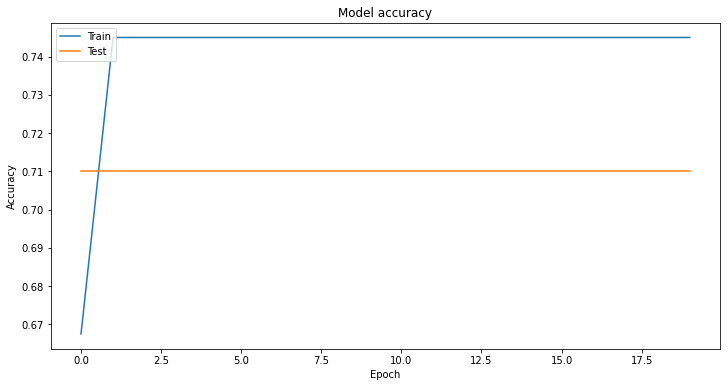

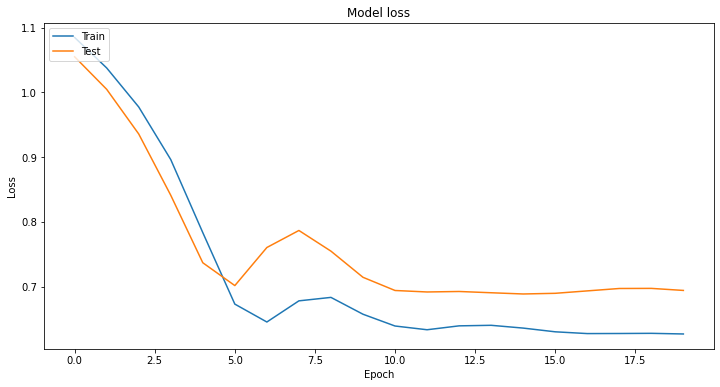

In [13]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


# 5.2 Evaluate the Model on Test Data

In [14]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')


1/1 [==============================] - 0s 46ms/step - loss: 0.6942 - accuracy: 0.7100
Test Loss: 0.6942486763000488
Test Accuracy: 0.7099999785423279


# Step 6: Save the Model

In [15]:
# Save the model
model.save('purchase_prediction_model.h5')
print("Model saved as 'purchase_prediction_model.h5'")


Model saved as 'purchase_prediction_model.h5'


# Make Predictions for a Recommendation System

load the necessary libraries, the trained model, and the purchase encoder.

In [19]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the trained model
model = load_model('purchase_prediction_model.h5')

# Ensure the purchase_encoder dictionary is available
# This should match the original encoding used during training
purchase_encoder = {
    'amazon': 0,
    'flipkart': 1,
    'myntra': 2,
    'electronics': 3,
    'fashion': 4,
    'books': 5,
    'home': 6,
    'beauty': 7
}
purchase_decoder = {v: k for k, v in purchase_encoder.items()}



# Step 2: Prepare the Recommendation Function
Create a function that will take the user's purchase history, process it, and generate recommendations.


In [20]:
def recommend_next_purchases(model, purchase_encoder, purchase_decoder, input_sequence, max_sequence_length, top_n=3):
    # Encode the input sequence
    encoded_sequence = [purchase_encoder[item] for item in input_sequence if item in purchase_encoder]
    
    # Pad the input sequence
    padded_sequence = pad_sequences([encoded_sequence], maxlen=max_sequence_length, padding='post')
    
    # Predict the next purchase probabilities
    predictions = model.predict(padded_sequence)[0]
    
    # Get the last prediction (for the next item in the sequence)
    next_purchase_probs = predictions[-1]
    
    # Get top N recommendations
    top_indices = next_purchase_probs.argsort()[-top_n:][::-1]
    top_recommendations = [purchase_decoder[idx] for idx in top_indices]
    
    return top_recommendations


# Step 3: Generate Recommendations
Use the function to generate recommendations based on a sample input sequence

In [21]:
# Define maximum sequence length (should match the length used during training)
max_sequence_length = 10  # Example value, should be adjusted to match your training configuration

# Sample user input sequence
sample_input_sequence = ['amazon', 'flipkart', 'myntra']

# Generate recommendations
recommendations = recommend_next_purchases(model, purchase_encoder, purchase_decoder, sample_input_sequence, max_sequence_length)
print(f"Recommendations for next purchases: {recommendations}")


1/1 [==============================] - 1s 798ms/step
Recommendations for next purchases: ['amazon', 'flipkart', 'myntra']
